# Exámen final
## Fese I: Desarrollo del Modelo Predictivo
Para esta primera fase del exámen final de machine learning se realizaran cinco (5) puntos principales:
- Realizar un análisis exploratorio de datos sobre las features, identificando cualquier patrón relevante o relación entre las variables.
- Preprocesar los datos adecuadamente.
- Realizar un análisis de las variables más importantes para la predicción, justificando su relevanacia
- Seleccionar y justificar el uso de l modelo de machine learning que se condere más adecuado.
- Entrenar le modelo y asegúrarse de evaluarlo con métricas adecuadas para un problema de clasificación, tales como precisión, recall, f1-score, o área bajo la curva ROC.

### Análisis exploratorio de datos (EDA)

Para hacer el análisis exploratorio de datos se está utilizando el set de datos `TechnicalInterviewFraudPrevention.csv`. La herramiento que voy a utilizar para analizar y manipular los datos será pandas.

In [2]:
# importación de la libreria `pandas`
import pandas as pd

In [3]:
# `lectura del conjunto de datos
df = pd.read_csv('data/TechnicalInterviewFraudPrevention.csv')

df

Como paso inicial en cada EDA es prioritario conocer que variables son, o no, categoricas. Para alcanzar lo anterior es útil saber cuántos tipos de columnas tenemos en el dataframe.

In [4]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

Es probable que las variables categoricas sean aquellas que sean de tipo objeto.

In [5]:
categorical_columns = list()
for i in df.columns:
    if df[i].dtype == 'object':
        categorical_columns.append(i)
categorical_columns

['J', 'Q', 'R', 'Monto']

Ya identificadas que columnas pueden ser categoricas (debido a su tipo de dato) se analizan para determinar con serteza su pertenencia a este conjunto

In [6]:
# valores de la columna J
df['J'].unique()

array(['UY', 'MX', 'US', 'ES', 'AR', 'CA', 'GB', 'UA', 'CL', 'CO', 'IT',
       'GT', 'PT', 'CH', 'TR', 'FR', 'KR', 'AU', 'BR'], dtype=object)

La columna J parece contener iniciales de paises, por ende si queda como variable categorica.

In [7]:
# valroes de la columna Q
df['Q'].unique()

array(['0.00', '600.17', '28.65', '181.94', '200.03', '283.99', '97.32',
       '244.31', '270.31', '49.19', '385.47', '505.80', '575.69', '18.27',
       '20.36', '42.08', '43.90', '51.76', '91.33', '147.30', '38.37',
       '31.04', '339.91', '244.51', '44.24', '47.42', '301.94', '98.12',
       '15.11', '33.35', '52.04', '82.88', '119.47', '44.85', '65.23',
       '42.70', '135.79', '135.28', '422.54', '187.99', '46.32', '16.12',
       '48.82', '246.20', '74.01', '276.50', '311.25', '335.27', '67.20',
       '25.44', '94.24', '18.74', '34.38', '50.03', '60.44', '29.04',
       '36.91', '34.83', '43.10', '51.62', '99.07', '50.00', '71.90',
       '187.66', '198.14', '188.97', '26.20', '375.32', '406.29',
       '262.53', '327.06', '19.69', '590.01', '45.10', '63.11', '80.33',
       '90.78', '89.21', '58.72', '24.10', '62.68', '72.35', '93.02',
       '206.17', '79.82', '771.71', '32.68', '71.51', '60.79', '33.25',
       '398.08', '37.30', '47.00', '68.43', '503.57', '94.86', '173.

Estos valores parecen ser números que fueron reconocidos como strings, se procede a convertirlos a flotantes.

In [8]:
# convertir los valores de la columna Q a flotantes
df['Q'] = df['Q'].str.replace(',', '').astype(float)

# eliminar de categorical_columns
categorical_columns.remove('Q')

categorical_columns

['J', 'R', 'Monto']

In [9]:
df['R'].unique()

array(['0.00', '361.94', '29.29', '50.68', '136.45', '357.53', '52.16',
       '159.62', '30.76', '35.89', '85.53', '37.89', '94.16', '50.88',
       '41.59', '15.08', '344.51', '78.61', '1,055.46', '188.32',
       '912.46', '179.71', '470.10', '52.03', '22.16', '13.78', '18.02',
       '503.60', '194.81', '158.96', '984.44', '320.21', '1,033.55',
       '275.39', '165.66', '137.77', '1,112.43', '47.36', '188.78',
       '78.10', '1,431.18', '354.48', '175.78', '17.92', '348.60',
       '165.23', '254.45', '21.15', '114.29', '559.21', '33.61', '123.25',
       '286.20', '42.36', '125.11', '127.48', '158.98', '78.60', '52.90',
       '39.78', '36.58', '186.62', '333.07', '217.72', '159.08', '289.45',
       '19.01', '239.63', '25.63', '31.75', '137.04', '687.53', '919.84',
       '63.01', '2,025.72', '50.48', '602.94', '69.10', '143.63',
       '213.95', '62.17', '818.12', '260.96', '314.22', '766.84',
       '692.42', '186.17', '53.37', '83.42', '330.21', '48.21', '191.60',
       '21

In [10]:
# convertir los valorse de la columna R a flotantes
df['R'] = df['R'].str.replace(',', '').astype(float)

# eliminar de categorical_columns
categorical_columns.remove('R')

categorical_columns

['J', 'Monto']

In [11]:
df.Monto.unique()

array(['37.51', '8.18', '13.96', ..., '132.17', '195.63', '21.58'],
      dtype=object)

In [12]:
# convertir los valores de la columna Monto a flotantes
df.Monto = df.Monto.str.replace(',','').astype(float)

# eliminar de categorical_columns
categorical_columns.remove('Monto')

categorical_columns

['J']

Como resultado solo nos quedó una variable categorica (`J`).

Como muestra de lo anterior hecho, podemos ver el tipo de dato que tiene cada columna y los valores nulos.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16880 entries, 0 to 16879
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       16880 non-null  int64  
 1   B       16880 non-null  int64  
 2   C       13683 non-null  float64
 3   D       16880 non-null  int64  
 4   E       16880 non-null  int64  
 5   F       16880 non-null  float64
 6   G       16880 non-null  float64
 7   H       16880 non-null  int64  
 8   I       16880 non-null  int64  
 9   J       16880 non-null  object 
 10  K       4016 non-null   float64
 11  L       16880 non-null  int64  
 12  M       16880 non-null  int64  
 13  N       16880 non-null  int64  
 14  O       16880 non-null  int64  
 15  P       16880 non-null  int64  
 16  Q       16880 non-null  float64
 17  R       16880 non-null  float64
 18  S       16880 non-null  float64
 19  Monto   16880 non-null  float64
 20  Fraude  16880 non-null  int64  
dtypes: float64(8), int64(12), object(1)

### Valores nulos

Los valores nulos en un EDA para machine learning representan uin gran inconveniente por varias razones:
- **impiden cálculos:** Muchas técnicas estadisticas y algoritmos de machine learning no pueden operar con valores faltantes, lo que limita el anñalisis y la construcción de modelos.
- **Sesgos en los resultados:** Si no se tratan adecuadamente, los valores nulos pueden introducir sesgos en lso datos y, por lo tanto, en los resultados del modelo.

De la información anterior nos dimos cuenta que la columna `C` y `K`. Para poder tratarlos, es necesario ver más a fondo que pasa con cada uno.

*acontinuación se presenta la cantidad de valores no nulos en cada columna*

<Axes: >

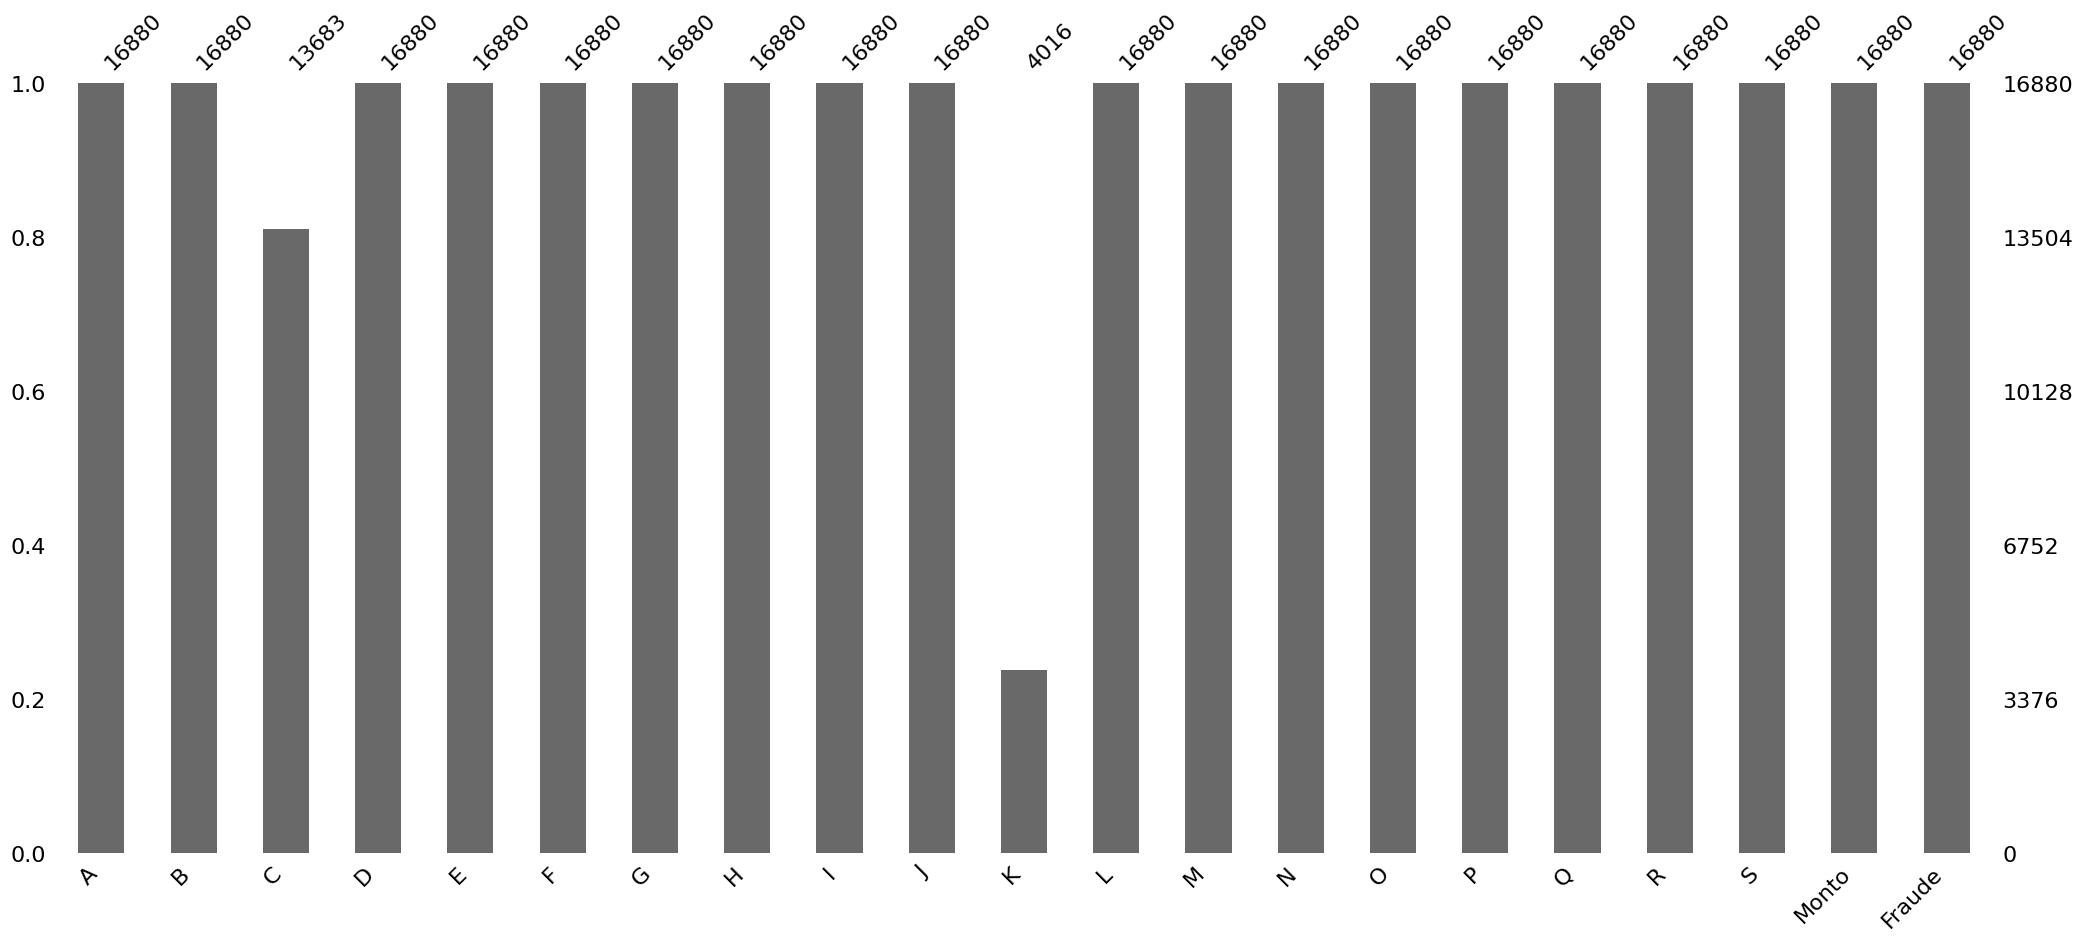

In [28]:
import missingno as msno

msno.bar(df)

In [24]:
# porcentaje de valores nulos en la columna C
print(f"porcentaje de valores nulos en C {(df.C.isnull().sum() * 100) / df.shape[0]}")
print(f"cantidad de valores nulos en C {df.C.isnull().sum()}")

porcentaje de valores nulos en C 18.93957345971564
cantidad de valores nulos en C 3197


debido a que la cantidad de los valores nulos no son tan significativos, entonces podemos rellenarlos con la media

In [29]:
df.C.fillna(df.C.mean(), inplace=True)

<Axes: >

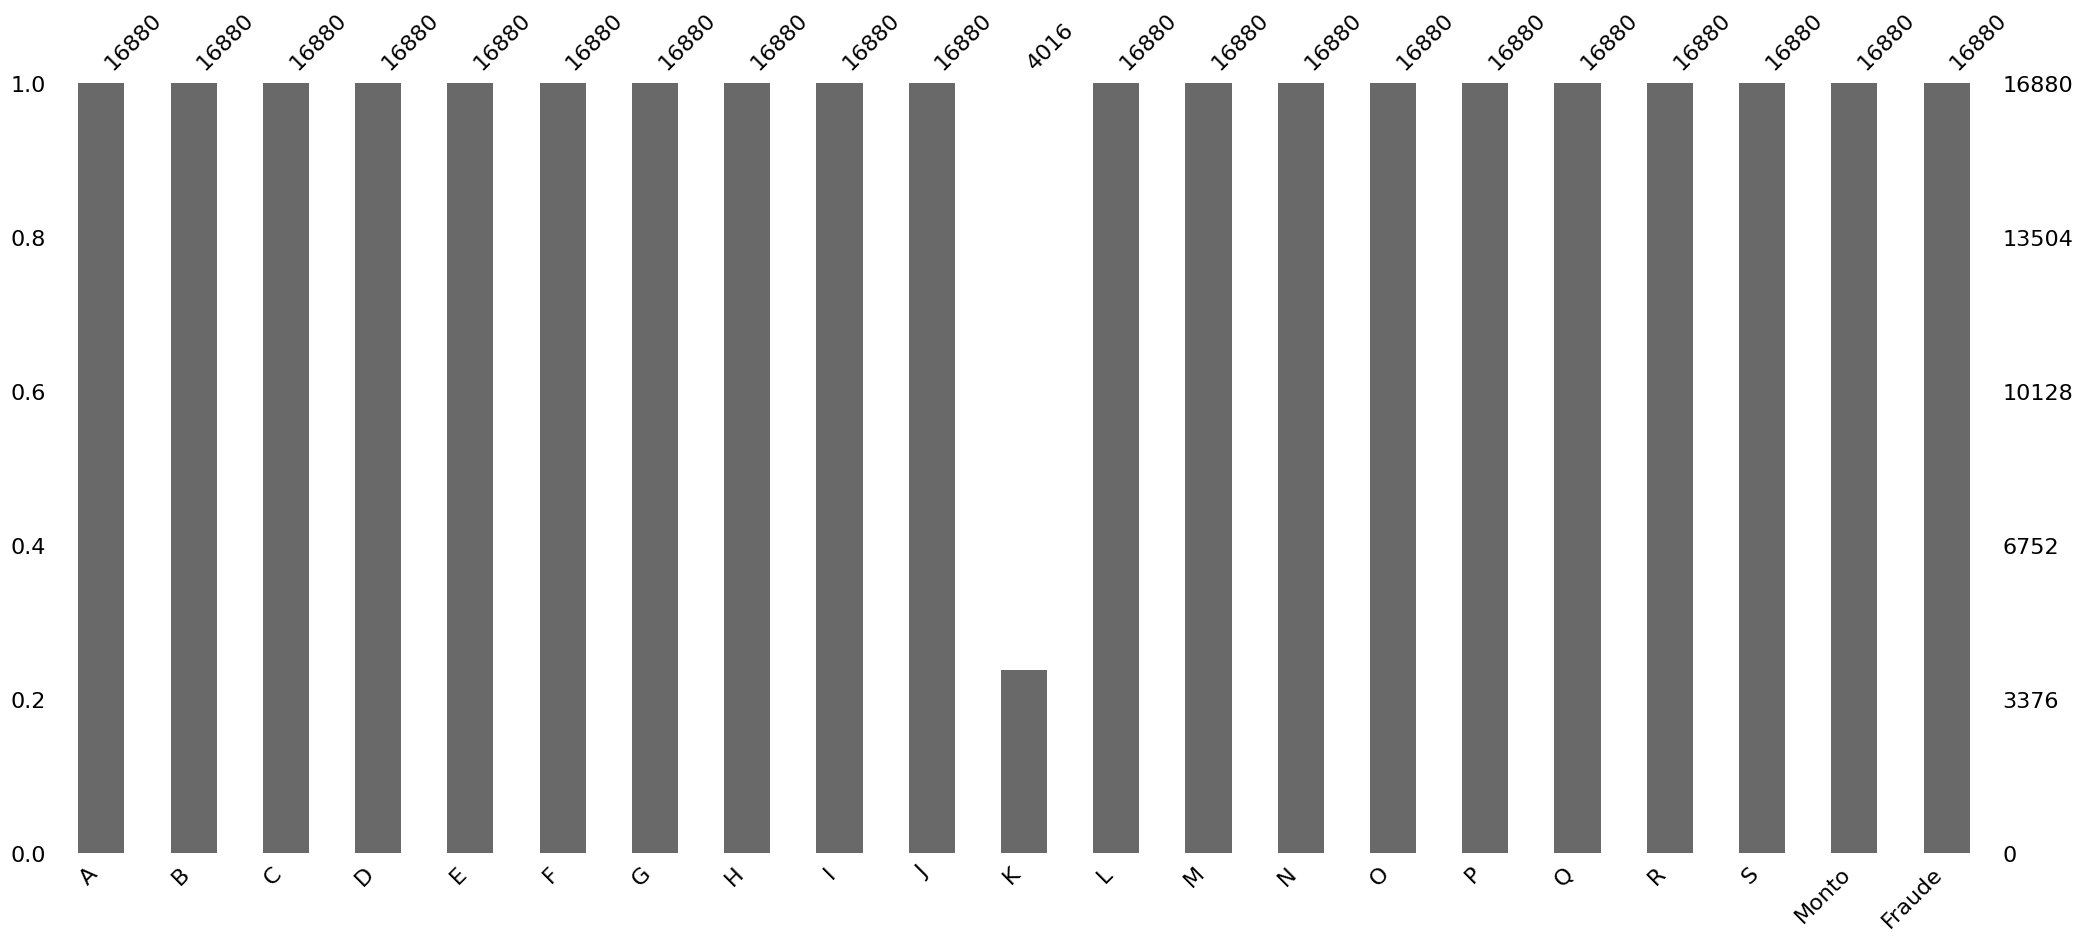

In [30]:
import missingno as msno

msno.bar(df)

Para la columna `K` no que nada que podamos hacer
![](https://i.scdn.co/image/ab67616d0000b273a4b223ad180a3a786d793106)

### Estadística descriptiva